In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-06-16 23:08:54.916128: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = tf.keras.datasets.mnist # mnist Es un módulo dentro de Keras que contiene datasets preinstalados y populares para pruebas y entrenamiento de modelos. 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

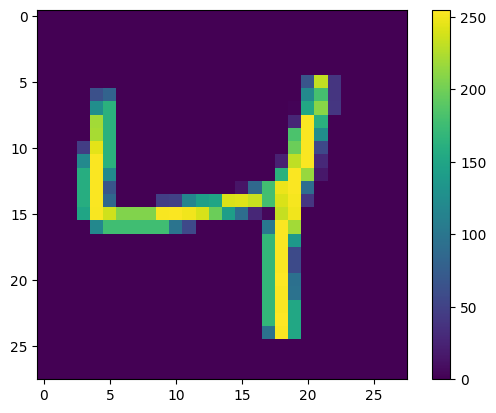

In [5]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# cada valor de píxel en una imagen está codificado como un número entero entre 0 y 255.
in_images = train_images / 255.0

test_images = test_images / 255.0

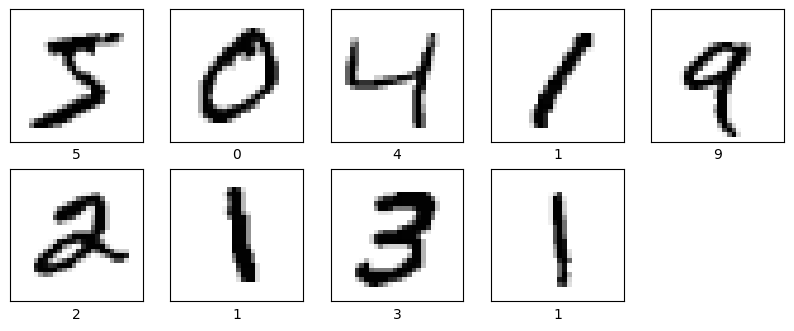

In [6]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Generación del modelo


In [ ]:
#Modelo de red neuronal simple llamado perceptron multicapa
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Convierte cada imagen de 28x28 píxeles en un vector de 784 píxeles.
    tf.keras.layers.Dense(units=128, activation='relu'), # Capa densa con 128 neuronas y función de activación ReLU.
    # RELU es una función de activación que deja pasar solo los valores positivos. Facilita el calculo del gradiente
    tf.keras.layers.Dense(units=10) #Tiene 10 neuronas, una por cada clase del MNIST (dígitos del 0 al 9).
])

/home/usuario/PSF/venv1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #Es una función de pérdida que se utiliza para clasificación multiclase, 
              # es decir, cuando tu modelo tiene que predecir una única clase entre varias posibles.
              metrics=['accuracy'])

Una época es cuando el modelo ha visto todo el conjunto de entrenamiento una vez completo.

Si tienes 10.000 imágenes de entrenamiento, una época significa pasar por las 10.000 imágenes una vez.

Una iteración es un solo paso de entrenamiento, es decir, una pasada de un batch.

In [ ]:
model.fit(train_images, train_labels, epochs=100, batch_size=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8268 - loss: 7.4525
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9094 - loss: 0.3736
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9283 - loss: 0.2828
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9370 - loss: 0.2455
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9434 - loss: 0.2234
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9500 - loss: 0.1979
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9505 - loss: 0.1950
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9519 - loss: 0.1967
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9574 - loss: 0.1803
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9582 - loss: 0.1638


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.1084 - loss: 2.3914

Test accuracy: 0.10840000212192535


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

#  Softmax  convierte los resultados sin normalizar que da el modelo (logits) en probabilidades entre 0 y 1 que suman 1.

In [12]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


In [13]:
np.argmax(predictions[0])

8

In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

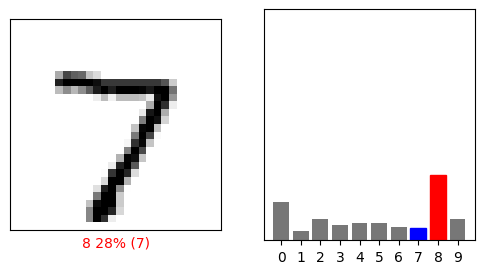

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

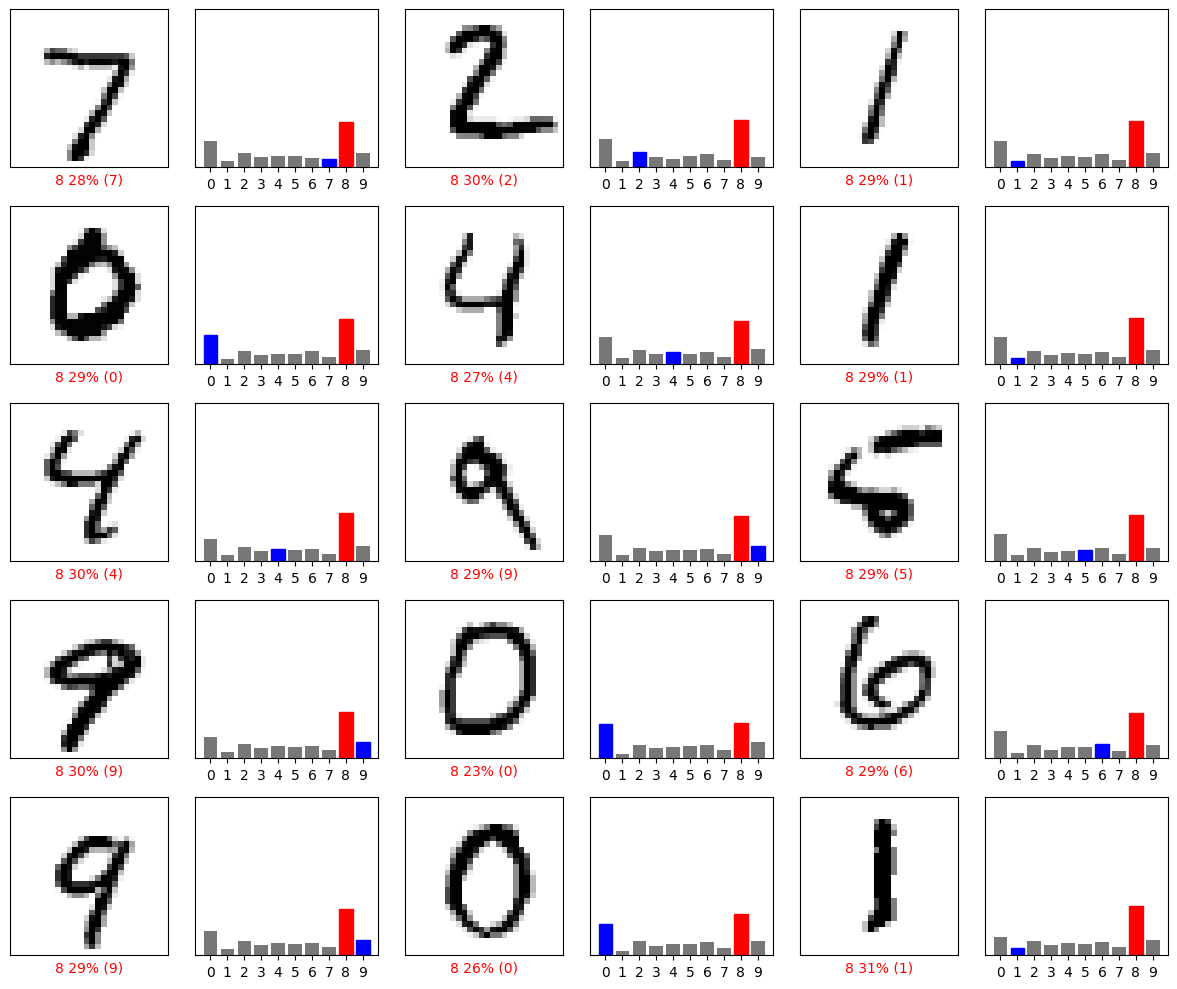

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()